<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/Linear_Regression_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [262]:
def get_data():
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                    'Acceleration', 'Model Year', 'Origin']

    raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                              sep=' ', skipinitialspace=True)

    # remove entries with missing values
    dataset = raw_dataset.dropna()
    # from sklearn import preprocessing
    # normalized_features = preprocessing.StandardScaler().fit_transform(dataset)
    # dataset = pd.DataFrame(data=normalized_features, columns=column_names)
    return dataset

In [263]:
def inspect_data(dataset):
    print('Dataset shape:')
    print(dataset.shape)

    print('Tail:')
    print(dataset.tail())

    print('Statistics:')
    print(dataset.describe().transpose())

    sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
    plt.show()

In [264]:
def split_data(dataset):
    train_dataset = dataset.sample(frac=0.8, random_state=0)
    test_dataset = dataset.drop(train_dataset.index)

    return train_dataset, test_dataset

Dataset shape:
(392, 8)
Tail:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  
Statistics:
              count         mean         std     min       25%      50%  \
MPG           392.0    23.445918    7.805007     9.0    17.000    22.75   
Cylinders     392.0     5.471939    1.705783     3.0     4.000     4.00   
Displacement  392.0   194.411990  104.644004    68.0   105.000   151.00   
Horsepower    392.0   104.469388   38.491160    46.0    75.000    93.

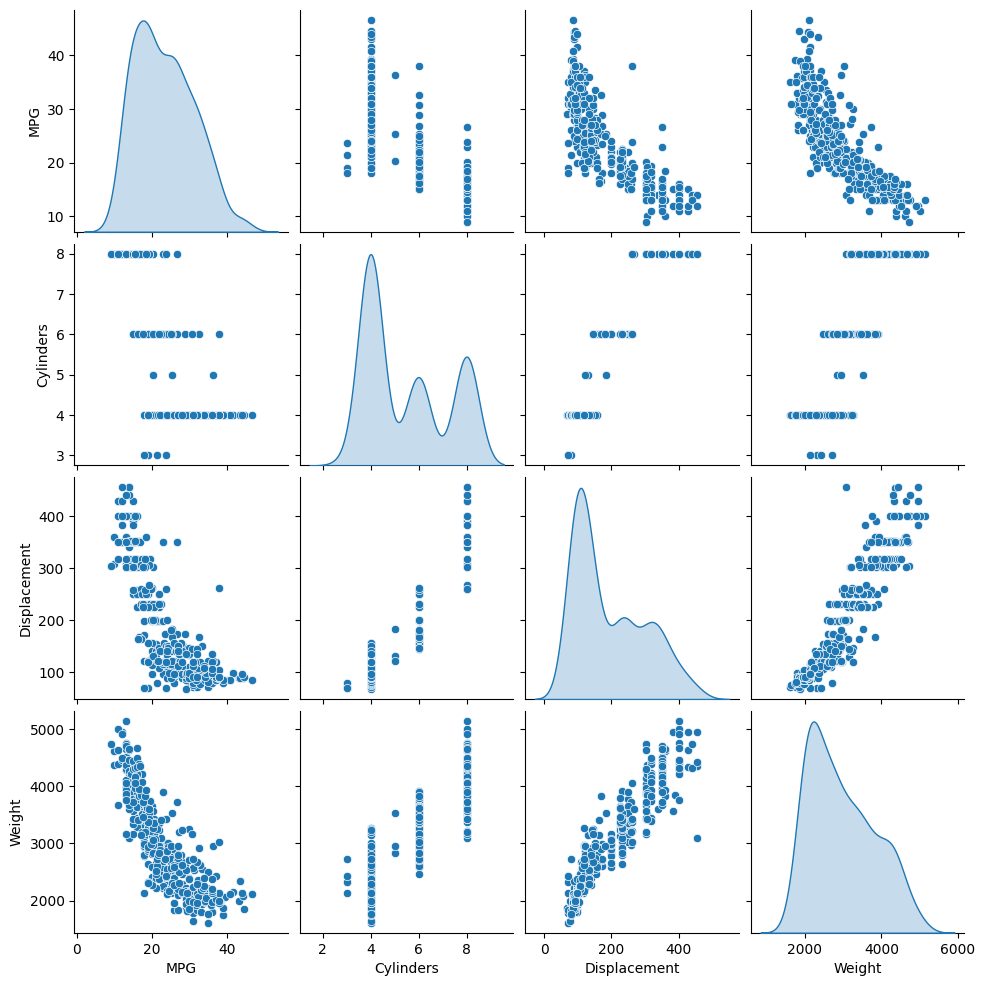

In [265]:
data = get_data()
inspect_data(data)

In [266]:
train_data, test_data = split_data(data)

In [267]:
# Simple Linear Regression
# predict MPG (y, dependent variable) using Weight (x, independent variable) using closed-form solution
# y = theta_0 + theta_1 * x - we want to find theta_0 and theta_1 parameters that minimize the prediction error

# We can calculate the error using MSE metric:
# MSE = SUM (from i=1 to n) (actual_output - predicted_output) ** 2

# get the columns
y_train = train_data['MPG'].to_numpy()
x_train = train_data['Weight'].to_numpy()

y_test = test_data['MPG'].to_numpy()
x_test = test_data['Weight'].to_numpy()

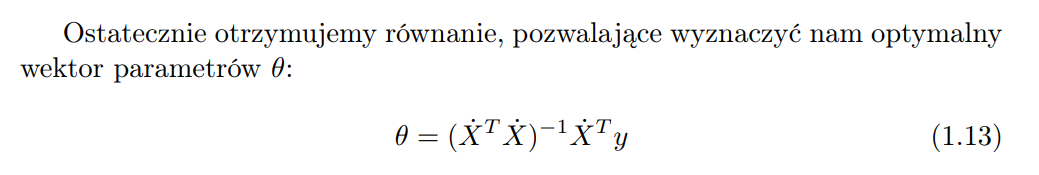

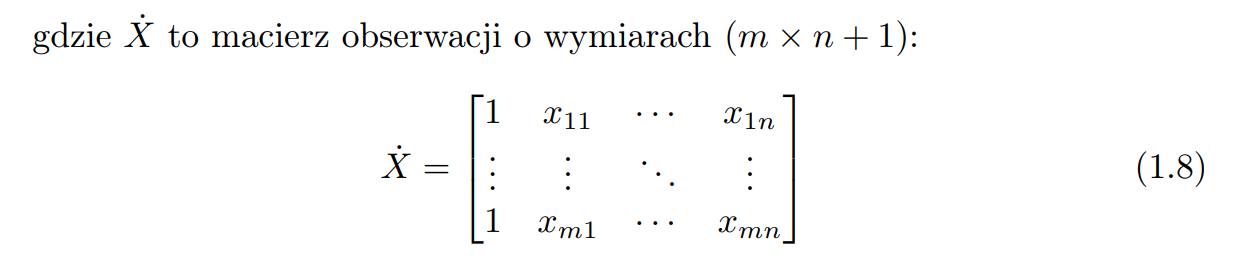

In [268]:
# TODO: calculate closed-form solution

theta_best = [0, 0]
X_train = np.c_[np.ones((len(x_train), 1)), x_train.reshape(-1, 1)]#1.8
X_test = np.c_[np.ones((len(x_test), 1)), x_test.reshape(-1, 1)]#1.8
#print(X[:5])

#1.13
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)  # closed-form solution
#print(type(theta_best))
#print(theta_best.shape)
theta_best

array([ 4.57612180e+01, -7.50796638e-03])

MSE for train set

In [269]:
m_train = len(X_train)
m_test = len(X_test)
# TODO: calculate error
y_pred_train = X_train.dot(theta_best)

y_pred_test = X_test.dot(theta_best)


mse_train = np.sum((y_pred_train - y_train) ** 2) / m_train
mse_test = np.sum((y_pred_test - y_test) ** 2) / m_test

print(f'MSE for train set at closed for closed-form solution: {round(mse_train,2)}')
print(f'MSE for test set at closed for closed-form solution: {round(mse_test,2)}')

MSE for train set at closed for closed-form solution: 19.53
MSE for test set at closed for closed-form solution: 15.34


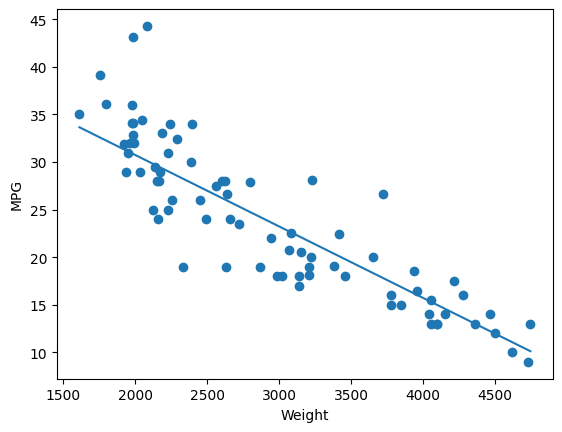

In [270]:
# plot the regression line
x = np.linspace(min(x_test), max(x_test), 100)
y = float(theta_best[0]) + float(theta_best[1]) * x
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

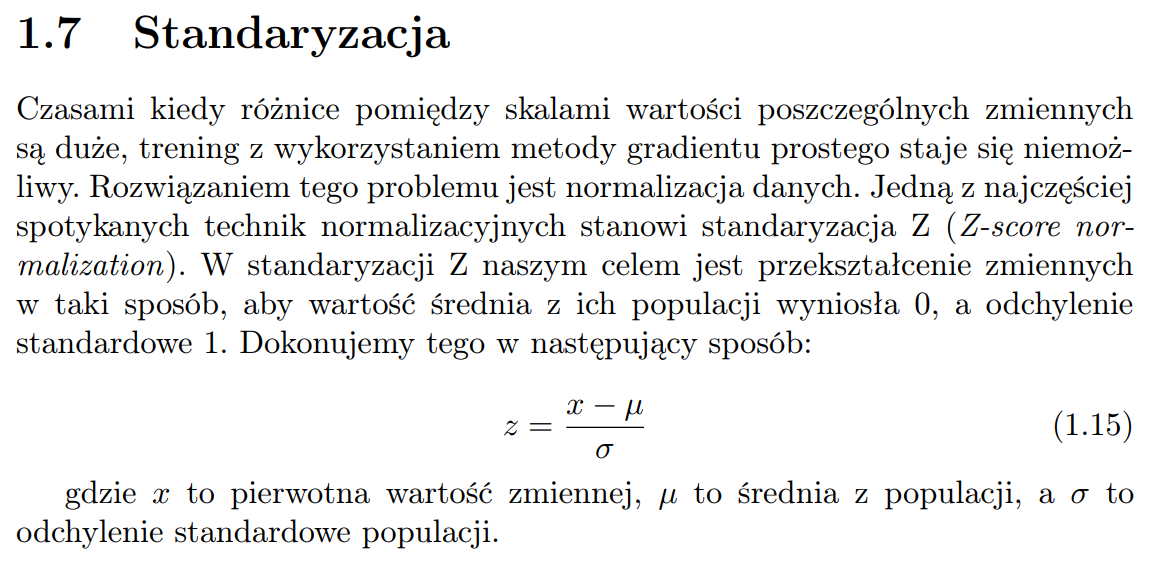

In [271]:
#x_train[:5]

In [272]:
# TODO: standardization

x_standard_deviation = np.std(x_train)#odchylenie standardowe dla x_train
x_average = np.average(x_train)#srednia z populacji (np.average oblicza średnią wartość)dla x_train

y_standard_deviation = np.std(y_train)#odchylenie standardowe dla y_train
y_average = np.average(y_train)#srednia z populacji (np.average oblicza średnią wartość) dla y_train


# Z score-normalization
x_train_standardized = (x_train - x_average) / x_standard_deviation
y_train_standardized = (y_train - y_average) / y_standard_deviation
x_test_standardized = (x_test - x_average) / x_standard_deviation
y_test_standardized = (y_test - y_average) / y_standard_deviation

Calculate standarized x_train,x_test, y_train, y_test

In [273]:
X_train_standardized = np.c_[np.ones((len(x_train_standardized), 1)), x_train_standardized.reshape(-1, 1)]
X_test_standardized = np.c_[np.ones((len(x_test_standardized), 1)), x_test_standardized.reshape(-1, 1)]

Y_train_standardized = y_train_standardized.reshape(-1, 1)
Y_test_standardized = y_test_standardized.reshape(-1, 1)

#print(f'x_train_standarized: {x_train_standardized}')
#print(f'y_test_standarized: {x_test_standardized}')
#print(f'y_train_standarized: {y_train_standardized}')
#print(f'y_test_standarized: {x_test_standardized}')

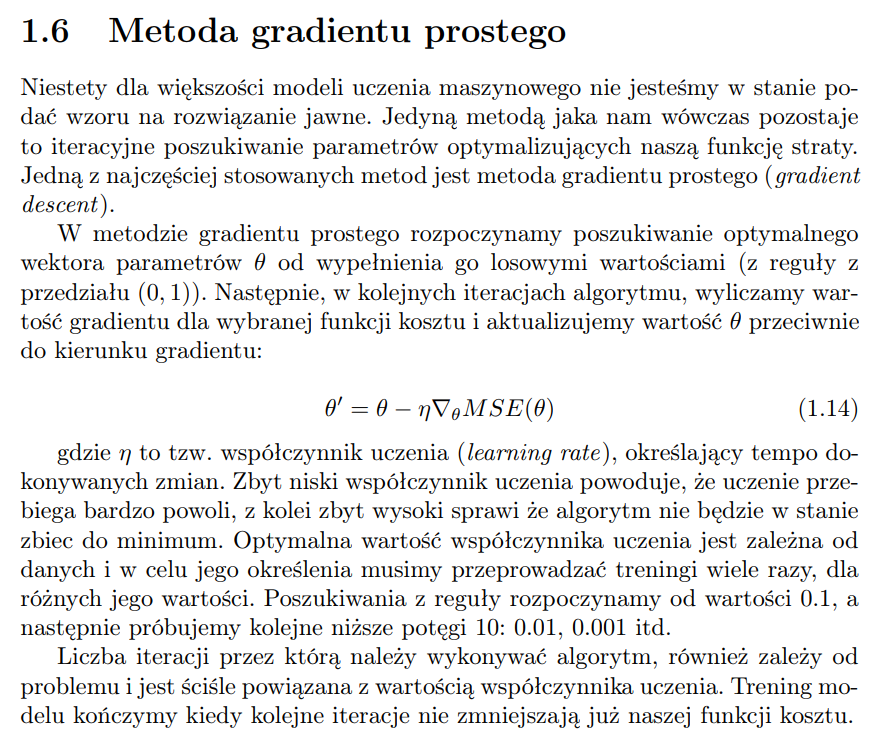

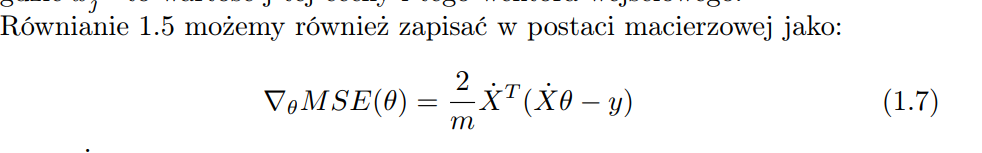

In [274]:
def gradient_descent(theta, x, y, eta):
    m = len(x)
    previous_mse = None
    while True:
        # Obliczanie gradientu MSE bezpośrednio w pętli
        gradients = 2/m * (x.T.dot(x.dot(theta) - y))
        theta = theta - eta * gradients

        # Obliczanie bieżącej wartości MSE
        current_mse = np.sum((x.dot(theta) - y) ** 2) / m


        # Sprawdzanie warunku stopu
        if previous_mse is not None and current_mse >= previous_mse:
            break
        previous_mse = current_mse
    return theta

In [275]:
theta = np.random.randn(2, 1)
eta = 0.0001
theta = gradient_descent(theta, X_train_standardized, Y_train_standardized, eta)
theta

array([[ 5.75350837e-07],
       [-8.19801742e-01]])

In [276]:
# TODO: calculate error

scaled_theta = theta.copy()
scaled_theta[1] = scaled_theta[1] * y_standard_deviation / x_standard_deviation
scaled_theta[0] = y_average - scaled_theta[1] * x_average
scaled_theta = scaled_theta.reshape(-1)

print(f'Theta: {scaled_theta}')
print(f'Best Theta: {theta_best}')

m_train = len(X_train_standardized)
m_test = len(X_test_standardized)
# Obliczanie przewidywanych wartości dla danych treningowych
y_pred_train_standarized = X_train_standardized.dot(scaled_theta)
y_pred_test_standarized = X_test_standardized.dot(scaled_theta)


# Obliczanie przewidywanych wartości dla danych treningowych
mse_train_standarized = np.sum((y_pred_train_standarized - y_train_standardized))**2 / m_train
mse_test_standarized = np.sum((y_pred_test_standarized - y_test_standardized))**2 / m_test

print(f'MSE for train standarized: {mse_train_standarized}')
print(f'MSE for test standarized: {mse_test_standarized}')

Theta: [ 4.57612183e+01 -7.50796648e-03]
Best Theta: [ 4.57612180e+01 -7.50796638e-03]
MSE for train standarized: 657543.9769896705
MSE for test standarized: 162714.02041385407


ERORR test standarized

<ipython-input-277-fbdd1ed06265>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(theta[0]) + float(theta[1]) * x


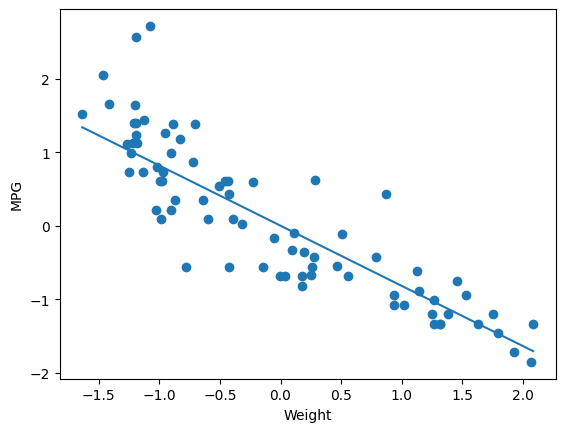

In [277]:
# plot the regression line
x = np.linspace(min(x_test_standardized), max(x_test_standardized), 100)
y = float(theta[0]) + float(theta[1]) * x
plt.plot(x, y)
plt.scatter(x_test_standardized, y_test_standardized)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()